In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')

# Random Forest

In [3]:
# Importamos los datos

data = np.load('../data/data.npz')
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

# Composición del modelo

In [6]:
from sklearn.ensemble import RandomForestRegressor

rfc_2 = RandomForestRegressor(max_depth=2) # como antes nos ha dado overfitting en todos los casos, hago profundidad de 3 (lo podamos)
rfc_2.fit(X_train, y_train)

rfc_3 = RandomForestRegressor(max_depth=3) # como antes nos ha dado overfitting en todos los casos, hago profundidad de 3 (lo podamos)
rfc_3.fit(X_train, y_train)

rfc_5 = RandomForestRegressor(max_depth=5) # como antes nos ha dado overfitting en todos los casos, hago profundidad de 3 (lo podamos)
rfc_5.fit(X_train, y_train)

rfc_7 = RandomForestRegressor(max_depth=7) # como antes nos ha dado overfitting en todos los casos, hago profundidad de 3 (lo podamos)
rfc_7.fit(X_train, y_train)

rfc = RandomForestRegressor() # como antes nos ha dado overfitting en todos los casos, hago profundidad de 3 (lo podamos)
rfc.fit(X_train, y_train)


RandomForestRegressor()

# Evaluación del modelo

In [7]:
from sklearn import metrics

# Calculamos los errores
print('para un Radom Forest de profundidad 2:')
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, rfc_2.predict(X_train))))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfc_2.predict(X_test))))
print("")

print('para un Radom Forest de profundidad 3:')
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, rfc_3.predict(X_train))))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfc_3.predict(X_test))))
print("")

print('para un Radom Forest de profundidad 5:')
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, rfc_5.predict(X_train))))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfc_5.predict(X_test))))
print("")

print('para un Radom Forest de profundidad 7:')
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, rfc_7.predict(X_train))))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfc_7.predict(X_test))))
print("")

print('para un Radom Forest de profundidad no limitada:')
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, rfc.predict(X_train))))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfc.predict(X_test))))
print("")


para un Radom Forest de profundidad 2:
Train RMSE: 453.46423702091107
Test RMSE: 442.353701856771

para un Radom Forest de profundidad 3:
Train RMSE: 374.1830967646855
Test RMSE: 402.8538021981619

para un Radom Forest de profundidad 5:
Train RMSE: 291.4210893818335
Test RMSE: 364.94530330650895

para un Radom Forest de profundidad 7:
Train RMSE: 233.57848085031517
Test RMSE: 329.1811530126543

para un Radom Forest de profundidad no limitada:
Train RMSE: 143.9864325353007
Test RMSE: 326.41051197852784



In [8]:
def comparation_chart(names, valores):
    # Set styles for axes
    plt.rcParams['axes.edgecolor']='#333F4B'
    plt.rcParams['axes.linewidth']=0.8
    plt.rcParams['xtick.color']='#333F4B'
    plt.rcParams['ytick.color']='#333F4B'

    # Plot
    fig, ax = plt.subplots(figsize=(12,5))
    plt.hlines(names, xmin=0, xmax=valores, color='#007acc', alpha=0.5, linewidth=5)

    plt.xticks(rotation=90)
    plt.plot(valores, names, "o", markersize=5, color='#007acc', alpha=0.9)
    plt.title('Models\' comparation')
    plt.xlabel('RMSE')
    plt.show()

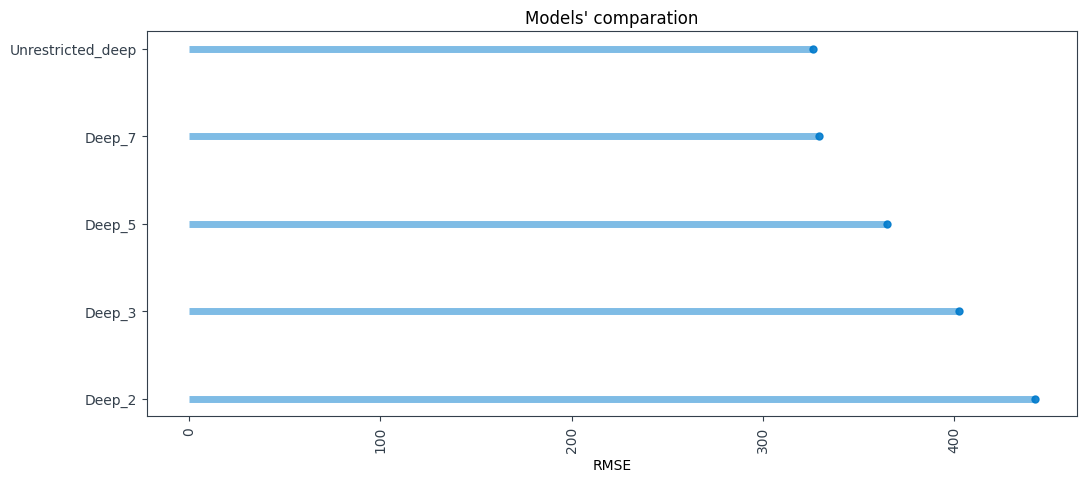

In [11]:
models = ['Deep_2', 'Deep_3', 'Deep_5', 'Deep_7', 'Unrestricted_deep']
RMSE = [np.sqrt(metrics.mean_squared_error(y_test, rfc_2.predict(X_test))), 
        np.sqrt(metrics.mean_squared_error(y_test, rfc_3.predict(X_test))), 
        np.sqrt(metrics.mean_squared_error(y_test, rfc_5.predict(X_test))),
        np.sqrt(metrics.mean_squared_error(y_test, rfc_7.predict(X_test))),
        np.sqrt(metrics.mean_squared_error(y_test, rfc.predict(X_test)))
        ]

comparation_chart(models, RMSE)

# Guardamos el modelo

In [12]:
import pickle

pickle.dump(rfc, open('../model/random_forest', 'wb'))

# Conclusión

El modelo Random Forest - sin restringir su profundidad - alcanza un RMSE de 326,41 ante datos nuevos (en test), por lo que tiene un rendimiento notablemente superior a la Regresión Lineal.